In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"../data/Trips_by_Distance.csv")
df_county = df.groupby(by='Level').get_group('County').reset_index()

In [4]:
df_county.columns

Index(['index', 'Level', 'Date', 'State FIPS', 'State Postal Code',
       'County FIPS', 'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')

In [5]:
df_county.to_csv(r'../data/County_only.csv')

In [24]:
grouped = df_county.groupby(by='Date')

In [25]:
plot_cols = ['Number of Trips','Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5','Number of Trips 5-10', 'Number of Trips 10-25','Number of Trips 25-50', 'Number of Trips 50-100','Number of Trips 100-250', 'Number of Trips 250-500','Number of Trips >=500']

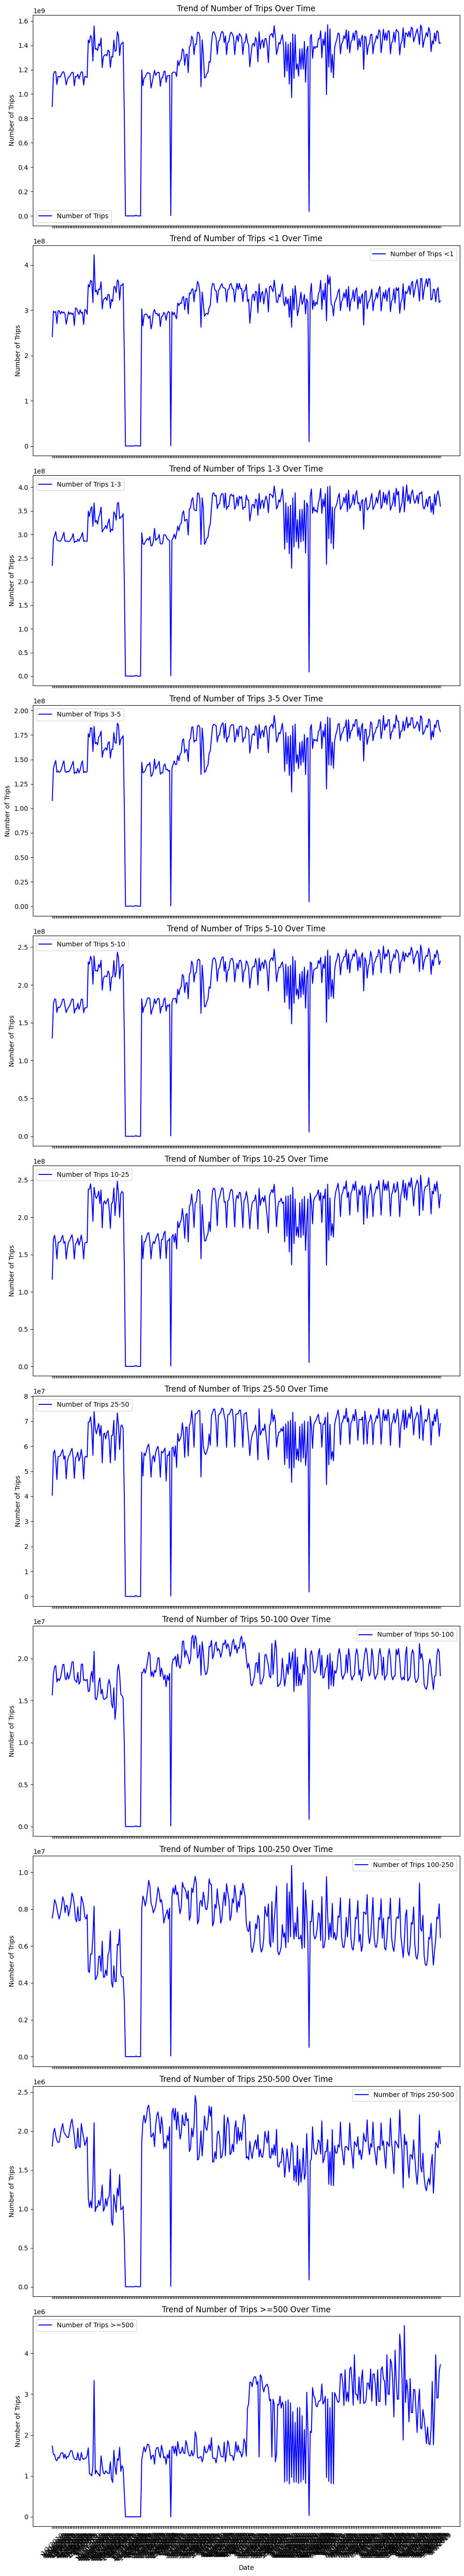

In [ ]:

grouped = grouped.sum().reset_index()
grouped = grouped.sort_values(by="Date")  # Sorting by chronological order

fig, axes = plt.subplots(len(plot_cols), 1, figsize=(10, 5 * len(plot_cols)), sharex=True)

# If only one plot, make axes iterable
if len(plot_cols) == 1:
    axes = [axes]

# Plot each trip bin in a separate subplot
for ax, col in zip(axes, plot_cols):
    ax.plot(grouped["Date"], grouped[col], label=col, color="b")
    ax.set_ylabel("Number of Trips")
    ax.set_title(f"Trend of {col} Over Time")
    ax.legend()


plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
grouped['Date'] = pd.to_datetime(grouped['Date'], errors='coerce')

grouped['Week'] = grouped['Date'].dt.to_period('W')
weekly_dips = grouped.groupby('Week')['Number of Trips >=500'].sum().nsmallest(10)
print(weekly_dips)


Week
2019-11-11/2019-11-17          0.0
2019-11-25/2019-12-01          0.0
2022-01-31/2022-02-06       1192.0
2019-11-04/2019-11-10       5026.0
2021-05-31/2021-06-06     962328.0
2019-10-28/2019-11-03    4634559.0
2021-06-14/2021-06-20    5119399.0
2021-06-07/2021-06-13    5988750.0
2019-10-21/2019-10-27    7795287.0
2019-10-07/2019-10-13    7892030.0
Freq: W-SUN, Name: Number of Trips >=500, dtype: float64
